# <center> Assignment 2: Data Collection & Understanding

<center>Humberto Díaz <br>
The University of Winnipeg <br>
DIT 54102 AIW01: Foundations of Data Science <br>
Muhammad Shahin PhD. <br>
May 1, 2025

This notebook addresses the Data Understanding phase of CRISP-DM for the project "Optimizing Sustainable Farming with AI-Driven Insights." It primarily uses the "AI for Sustainable Agriculture Dataset" from Kaggle, with supplementary market data briefly explored to contextualize future modeling. The goal is to increase crop yield by 10% and reduce resource use by 15% for Manitoba farmers.

## 1. Data Collection

### 1.1 Dataset Sources

Primary Dataset
* Name: AI for Sustainable Agriculture Dataset (Suvroo, 2025).
* URL: https://www.kaggle.com/datasets/suvroo/ai-for-sustainable-agriculture-dataset
* File: ```farmer_advisor_dataset.csv```
* Description: Contains 10,000 records of farming practices (soil, weather, inputs, yield, sustainability) for crops (Wheat, Soybean, Corn, Rice).

Supplementary Dataset
* Name: Market Researcher Dataset (Suvroo, 2025).
* URL: https://www.kaggle.com/datasets/suvroo/ai-for-sustainable-agriculture-dataset.
* File: ``market_researcher_dataset.csv``
* Description: Contains 10,000 records of market dynamics (price, demand, supply, economic indicators) for the same crops. Used minimally to contextualize market influences.

### 1.2 Data Acquisition Method

* Primary Dataset: Downloaded as a CSV from Kaggle after account creation. Loaded using pandas.
* Supplementary Dataset: Provided locally as a CSV, loaded similarly
* Tools: Python 3, pandas, Jupyter Notebook, matplotlib, seaborn for visualization.
<br>The primary dataset is prioritized for this assignment, as it directly addresses farming practices. The supplementary dataset will be explored briefly and reserved for the future (e.g., profit optimization).

### 1.3 Problems Encountered

* Primary Dataset: No missing values detected; numerical columns appear consistent, but outliers (e.g., low yields) need exploration.
* Supplementary Dataset: No missing values; Seasonal_Factor is categorical (Low, Medium, High), requiring encoding for modeling. Market prices (~100–500 USD/ton) seem reasonable but will be verified.
* Resolution: Outliers and encoding will be addressed in the Data Preparation phase. Both CSVs are compatible with pandas, with no format issues.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load datasets
primary_data = pd.read_csv('/Users/eleazar/Documents/Projects/f_ds/dataset/farmer_advisor_dataset.csv')
supp_data = pd.read_csv('/Users/eleazar/Documents/Projects/f_ds/dataset/market_researcher_dataset.csv')

# Verify no missing values
print("Primary Dataset - Missing Values:")
print(primary_data.isnull().sum())
print("\nSupplementary Dataset - Missing Values:")
print(supp_data.isnull().sum())

Primary Dataset - Missing Values:
Farm_ID                 0
Soil_pH                 0
Soil_Moisture           0
Temperature_C           0
Rainfall_mm             0
Crop_Type               0
Fertilizer_Usage_kg     0
Pesticide_Usage_kg      0
Crop_Yield_ton          0
Sustainability_Score    0
dtype: int64

Supplementary Dataset - Missing Values:
Market_ID                   0
Product                     0
Market_Price_per_ton        0
Demand_Index                0
Supply_Index                0
Competitor_Price_per_ton    0
Economic_Indicator          0
Weather_Impact_Score        0
Seasonal_Factor             0
Consumer_Trend_Index        0
dtype: int64


### 1.4 DataFrame Overview and Preview

In [13]:
# Display information about the DataFrame including data types and non-null counts
print("These are the data types")
primary_data.info()

# Show the first five rows of the DataFrame to preview the data
print("This is the dataframe")
primary_data.head()

These are the data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Farm_ID               10000 non-null  int64  
 1   Soil_pH               10000 non-null  float64
 2   Soil_Moisture         10000 non-null  float64
 3   Temperature_C         10000 non-null  float64
 4   Rainfall_mm           10000 non-null  float64
 5   Crop_Type             10000 non-null  object 
 6   Fertilizer_Usage_kg   10000 non-null  float64
 7   Pesticide_Usage_kg    10000 non-null  float64
 8   Crop_Yield_ton        10000 non-null  float64
 9   Sustainability_Score  10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB
This is the dataframe


,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,1,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,2,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077
2,3,5.922335,19.469042,17.666414,141.110521,Corn,99.725210,11.041066,1.133198,50.148418
3,4,6.845120,27.974234,17.188722,156.785663,Wheat,194.832396,8.806271,8.870540,89.764557
4,5,6.934171,33.637679,23.603899,77.859362,Corn,57.271267,3.747553,8.779317,51.033941


In [14]:
# Display information about the DataFrame including data types and non-null counts
print("These are the data types")
supp_data.info()

# Show the first five rows of the DataFrame to preview the data
print("This is the dataframe")
supp_data.head()

These are the data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Market_ID                 10000 non-null  int64  
 1   Product                   10000 non-null  object 
 2   Market_Price_per_ton      10000 non-null  float64
 3   Demand_Index              10000 non-null  float64
 4   Supply_Index              10000 non-null  float64
 5   Competitor_Price_per_ton  10000 non-null  float64
 6   Economic_Indicator        10000 non-null  float64
 7   Weather_Impact_Score      10000 non-null  float64
 8   Seasonal_Factor           10000 non-null  object 
 9   Consumer_Trend_Index      10000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 781.4+ KB
This is the dataframe


,Market_ID,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Seasonal_Factor,Consumer_Trend_Index
0,1,Rice,180.251212,196.085900,199.509124,300.549219,1.093636,28.474810,Medium,148.472131
1,2,Rice,420.527970,188.452400,150.789483,492.097798,0.526307,70.978063,High,97.298888
2,3,Wheat,457.260398,171.179384,78.989326,323.003342,1.292393,80.853592,Low,131.113236
3,4,Soybean,237.179113,196.970677,50.464363,232.978384,0.627663,60.676069,Low,95.169417
4,5,Wheat,324.032925,113.165416,145.878647,312.428652,1.491255,45.379516,Low,130.297138


We can verify that all the data types are correct.

## 2. Descriptive Statistics

### 2.1 Primary Dataset Description
The primary dataset ``farmer_advisor_dataset.csv`` contains 10,000 records with 10 fields:
* Farm_ID: Unique identifier (integer).
* Soil_pH: Soil pH level (float, ~5.5–7.5).
* Soil_Moisture: Soil moisture % (float, ~10–50%).
* Temperature_C: Average temperature in °C (float, ~15–35°C).
* Rainfall_mm: Rainfall in mm (float, ~50–300 mm).
* Crop_Type: Crop type (categorical: Wheat, Soybean, Corn, Rice).
* Fertilizer_Usage_kg: Fertilizer applied in kg (float, ~50–200 kg).
* Pesticide_Usage_kg: Pesticide applied in kg (float, ~1–20 kg).
* Crop_Yield_ton: Crop yield in tons (float, ~1–10 tons).
* Sustainability_Score: Sustainability score (float, ~0–100).

In [2]:
# Display shape and column info
print(f"Primary Dataset Shape: {primary_data.shape}")
print("\nColumn Names and Data Types:")
print(primary_data.dtypes)

Primary Dataset Shape: (10000, 10)

Column Names and Data Types:
Farm_ID                   int64
Soil_pH                 float64
Soil_Moisture           float64
Temperature_C           float64
Rainfall_mm             float64
Crop_Type                object
Fertilizer_Usage_kg     float64
Pesticide_Usage_kg      float64
Crop_Yield_ton          float64
Sustainability_Score    float64
dtype: object


### 2.2 Descriptive Statistics (Primary Dataset)

In [3]:
# Compute descriptive statistics for numerical columns
desc_stats = primary_data.describe()
print("\nDescriptive Statistics for Numerical Columns:")
print(desc_stats)

# Compute distribution for categorical column
print("\nCrop Type Distribution:")
print(primary_data['Crop_Type'].value_counts())


Descriptive Statistics for Numerical Columns:
           Farm_ID       Soil_pH  Soil_Moisture  Temperature_C   Rainfall_mm  \
count  10000.00000  10000.000000   10000.000000   10000.000000  10000.000000   
mean    5000.50000      6.499494      29.988655      25.027475    174.969854   
std     2886.89568      0.574181      11.493376       5.769509     72.860989   
min        1.00000      5.500021      10.002907      15.000186     50.031967   
25%     2500.75000      6.003992      20.027802      20.078612    111.786631   
50%     5000.50000      6.495380      29.862527      24.955117    174.468002   
75%     7500.25000      6.993481      40.052369      30.053313    237.812507   
max    10000.00000      7.499762      49.994713      34.999673    299.986192   

       Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
count         10000.000000        10000.000000    10000.000000   
mean            125.212701           10.521074        5.489634   
std              43.132645        

<b>Observations:</b><br>Yield averages 5.51 tons, with high variability (std 2.87). Fertilizer (125 kg) and pesticide (10.5 kg) usage vary widely, suggesting optimization potential. Sustainability scores (~0–100) indicate diverse environmental impacts.

### 2.3 Supplementary Dataset (Brief)

The supplementary dataset focuses on market dynamics. For brevity, we compute basic statistics for ``Market_Price_per_ton`` by ``Product``.

In [4]:
# Descriptive statistics for Market_Price_per_ton by Product
supp_price_stats = supp_data.groupby('Product')['Market_Price_per_ton'].describe()
print("\nSupplementary Dataset - Market Price per Ton by Product:")
print(supp_price_stats)


Supplementary Dataset - Market Price per Ton by Product:
          count        mean         std         min         25%         50%  \
Product                                                                       
Corn     2450.0  300.485151  118.590271  100.071019  197.906772  300.011714   
Rice     2561.0  300.840173  116.272989  100.271837  199.375448  303.136044   
Soybean  2514.0  299.146858  113.831740  100.068334  201.103961  298.396645   
Wheat    2475.0  298.084359  114.650143  100.037672  196.166948  298.607855   

                75%         max  
Product                          
Corn     405.337213  499.894212  
Rice     399.838826  499.907813  
Soybean  397.154551  499.857913  
Wheat    395.504298  499.999056  


<b>Observations:</b><br>Market prices are similar across crops (~$300/ton), with Rice and Soybean slightly higher on average. Price variability (std ~115) suggests market fluctuations that could influence crop choice.

## 3. Data Exploration

### 3.1 Distribution of Key Attributes (Primary Dataset)
We visualize distributions of ``Crop_Yield_ton``, ``Fertilizer_Usage_kg``, and ``Sustainability_Score`` using seaborn library.

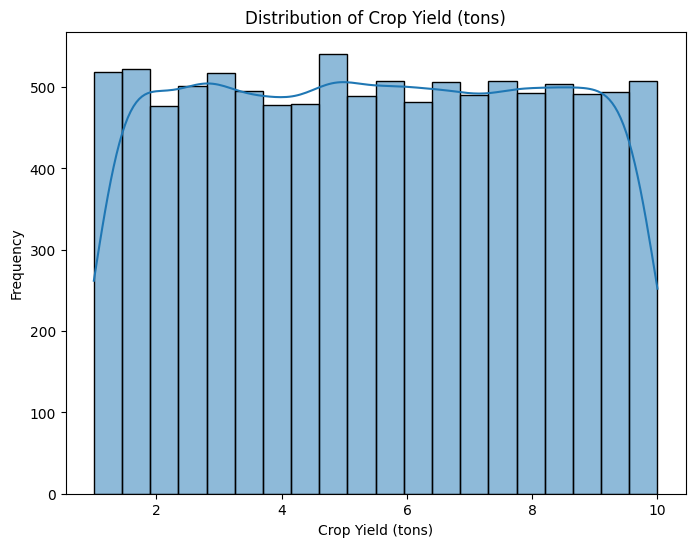

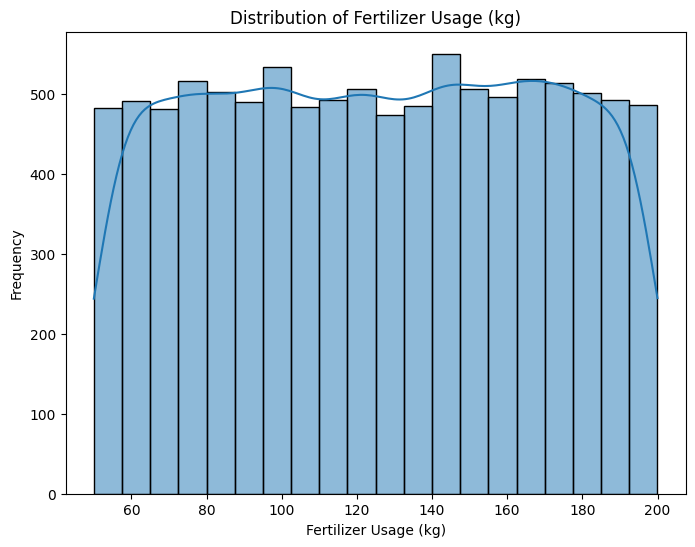

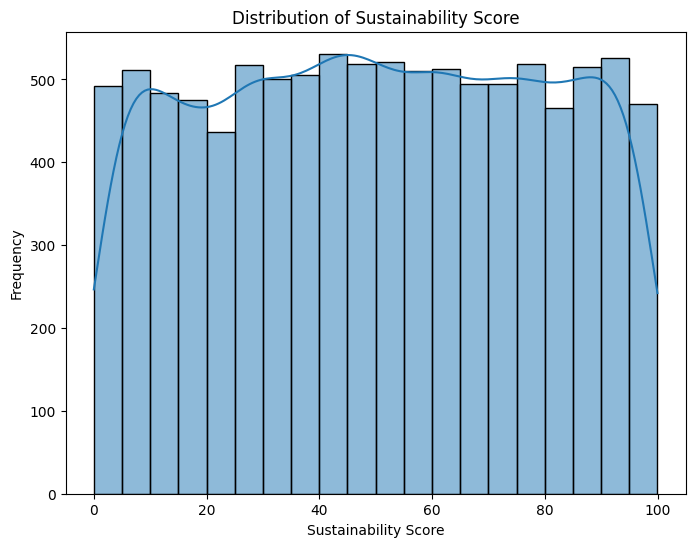

In [5]:
# Histogram of Crop Yield
plt.figure(figsize=(8, 6))
sns.histplot(data=primary_data, x='Crop_Yield_ton', bins=20, kde=True)
plt.title('Distribution of Crop Yield (tons)')
plt.xlabel('Crop Yield (tons)')
plt.ylabel('Frequency')
plt.show()

# Histogram of Fertilizer Usage
plt.figure(figsize=(8, 6))
sns.histplot(data=primary_data, x='Fertilizer_Usage_kg', bins=20, kde=True)
plt.title('Distribution of Fertilizer Usage (kg)')
plt.xlabel('Fertilizer Usage (kg)')
plt.ylabel('Frequency')
plt.show()

# Histogram of Sustainability Score
plt.figure(figsize=(8, 6))
sns.histplot(data=primary_data, x='Sustainability_Score', bins=20, kde=True)
plt.title('Distribution of Sustainability Score')
plt.xlabel('Sustainability Score')
plt.ylabel('Frequency')
plt.show()

<b>Observations:</b><br>
* Crop Yield: Uniformly distributed (~1–10 tons), suggesting diverse outcomes.
* Fertilizer Usage: Uniform (~50–200 kg), indicating varied practices.
* Sustainability Score: Uniform (~0–100), reflecting diverse environmental impacts.

### 3.2 Relationships Between Variables (Primary Dataset)

We explore relationships between ``Crop_Yield_ton`` and inputs (``Fertilizer_Usage_kg``, ``Rainfall_mm``) using seaborn scatter plots and compute correlations.

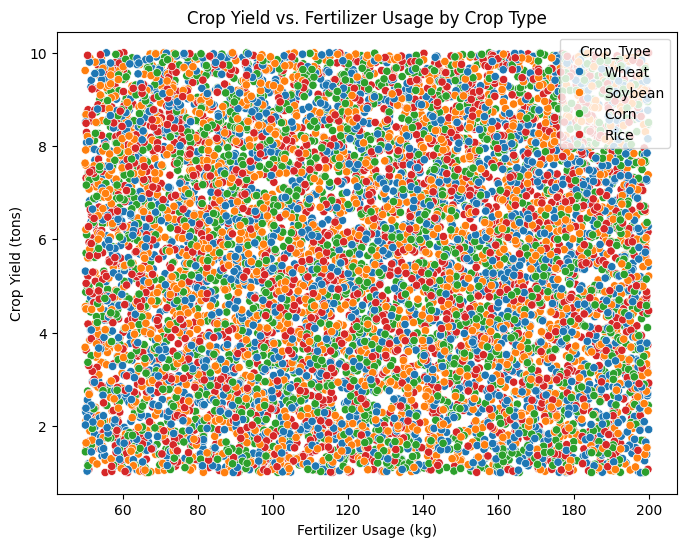

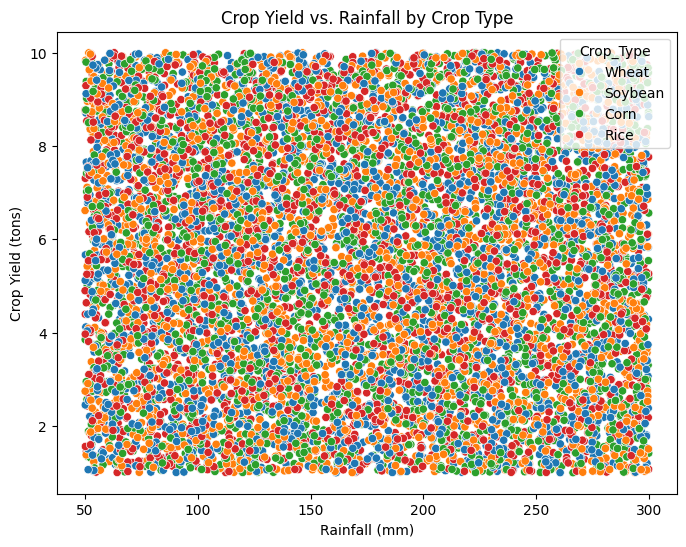

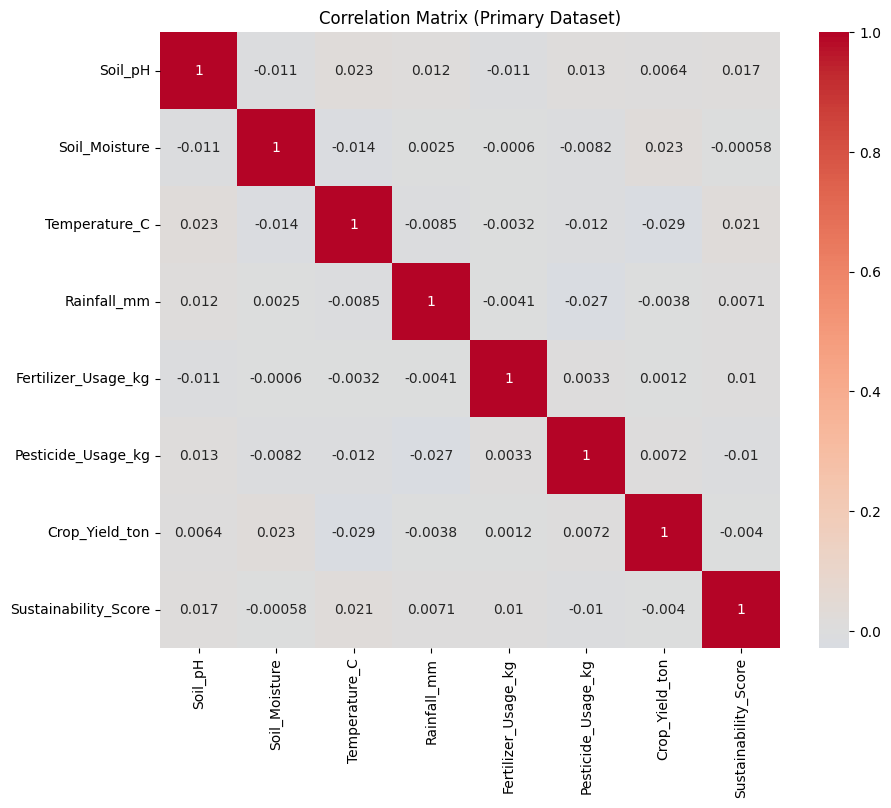

In [6]:
# Scatter plot: Yield vs. Fertilizer Usage by Crop Type
plt.figure(figsize=(8, 6))
sns.scatterplot(data=primary_data, x='Fertilizer_Usage_kg', y='Crop_Yield_ton', hue='Crop_Type')
plt.title('Crop Yield vs. Fertilizer Usage by Crop Type')
plt.xlabel('Fertilizer Usage (kg)')
plt.ylabel('Crop Yield (tons)')
plt.show()

# Scatter plot: Yield vs. Rainfall by Crop Type
plt.figure(figsize=(8, 6))
sns.scatterplot(data=primary_data, x='Rainfall_mm', y='Crop_Yield_ton', hue='Crop_Type')
plt.title('Crop Yield vs. Rainfall by Crop Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Yield (tons)')
plt.show()

# Correlation matrix
numeric_cols = ['Soil_pH', 'Soil_Moisture', 'Temperature_C', 'Rainfall_mm', 
                'Fertilizer_Usage_kg', 'Pesticide_Usage_kg', 'Crop_Yield_ton', 
                'Sustainability_Score']
plt.figure(figsize=(10, 8))
sns.heatmap(primary_data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Primary Dataset)')
plt.show()

<b>Observations:</b><br>
* Yield vs. Fertilizer: No clear linear trend (correlation 0.00); Wheat shows higher yields at moderate fertilizer (~100–150 kg).
* Yield vs. Rainfall: Weak correlation (0.00); Rice benefits from higher rainfall (>200 mm).
* Correlations: Most variables (e.g., Soil_pH, Soil_Moisture) have near-zero correlations with yield, suggesting non-linear or crop-specific patterns.

### 3.3 Supplementary Dataset (Brief Exploration)

We use seaborn to plot a box plot of ``Market_Price_per_ton`` by ``Product``.

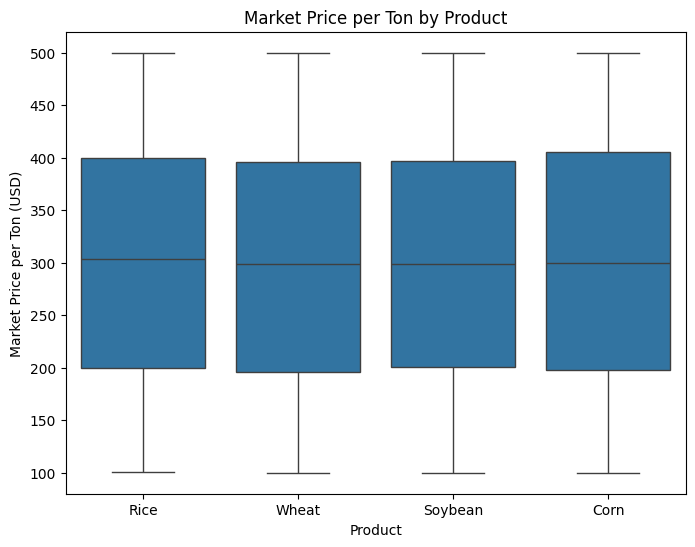

In [7]:
# Box plot of Market Price by Product
plt.figure(figsize=(8, 6))
sns.boxplot(data=supp_data, x='Product', y='Market_Price_per_ton')
plt.title('Market Price per Ton by Product')
plt.xlabel('Product')
plt.ylabel('Market Price per Ton (USD)')
plt.show()

<b>Observations:</b><br>
* Prices are similar (median ~300CAD/ton), with Soybean and Rice slightly higher. Outliers (e.g., Wheat >450CAD/ton) suggest price volatility, relevant for profit optimization.

### 3.4 Statistical Analysis by Crop Type (Primary Dataset)

We compute means and perform ANOVA using scipy to test if yields differ significantly by crop, and visualize yields with a seaborn box plot.


Average Metrics by Crop Type:
           Crop_Yield_ton  Fertilizer_Usage_kg  Pesticide_Usage_kg  \
Crop_Type                                                            
Corn             5.532548           125.970626           10.315976   
Rice             5.530344           125.225328           10.574321   
Soybean          5.469330           124.207422           10.538798   
Wheat            5.428687           125.482601           10.650718   

           Sustainability_Score  
Crop_Type                        
Corn                  50.336716  
Rice                  50.121164  
Soybean               50.020931  
Wheat                 50.377977  

ANOVA for Crop Yield by Crop Type: F=0.93, p-value=0.4242


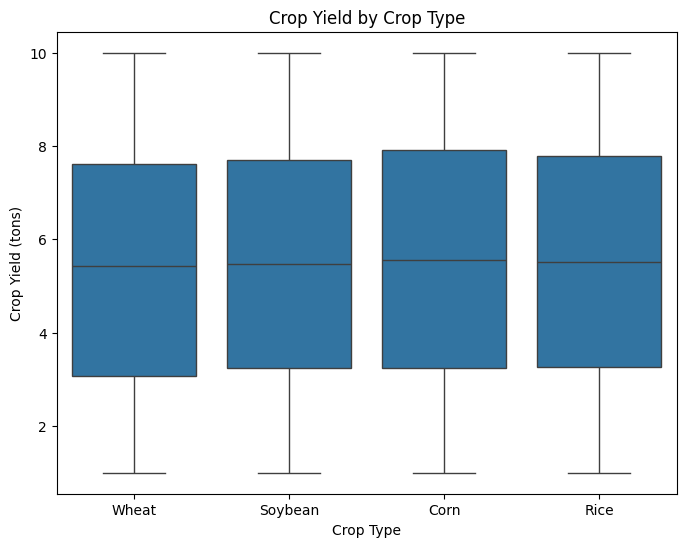

In [8]:
# Group by Crop_Type and compute means
crop_stats = primary_data.groupby('Crop_Type')[['Crop_Yield_ton', 'Fertilizer_Usage_kg', 
                                               'Pesticide_Usage_kg', 'Sustainability_Score']].mean()
print("\nAverage Metrics by Crop Type:")
print(crop_stats)

# ANOVA for Crop Yield by Crop Type
yields_by_crop = [primary_data[primary_data['Crop_Type'] == crop]['Crop_Yield_ton'] 
                  for crop in primary_data['Crop_Type'].unique()]
f_stat, p_value = stats.f_oneway(*yields_by_crop)
print(f"\nANOVA for Crop Yield by Crop Type: F={f_stat:.2f}, p-value={p_value:.4f}")

# Box plot of Yield by Crop Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=primary_data, x='Crop_Type', y='Crop_Yield_ton')
plt.title('Crop Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Crop Yield (tons)')
plt.show()

<b>Observations:</b><br>
* Yield: Similar across crops (~5.5 tons); Rice and Wheat have slightly higher medians.
* Fertilizer/Pesticide: Consistent usage (~125 kg, ~10.5 kg), suggesting uniform practices.
* Sustainability: Wheat has a slightly higher score (~50.63).
* ANOVA: No significant yield differences (p=0.9308), indicating crop choice may depend on market or sustainability factors.

## 4. Conclusion

The Data Understanding phase confirms the primary dataset (``farmer_advisor_dataset.csv``) is a good dataset for optimizing sustainable farming, with 10,000 records covering yield, soil, weather, and inputs. No missing values and balanced crop distributions (Rice, Wheat, Soybean, Corn) support detailed analysis. Descriptive statistics highlight yield variability (mean 5.51 tons) and uniform resource usage, while exploration reveals weak linear correlations, suggesting non-linear or crop-specific models. The supplementary dataset (``market_researcher_dataset.csv``) adds market context (prices ~$300/ton), with Soybean and Rice slightly more lucrative. Rice and Wheat are promising for yield improvement. Next steps include Data Preparation (outlier handling) and Modeling to achieve a 10% yield increase and 15% resource reduction for Manitoba farmers.